<a href="https://colab.research.google.com/github/shubham953/Donut_CNN_example_exercise/blob/main/Titanic%20Dataset%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Space Ship Titanic problem solving session

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<img src="https://cdn.mos.cms.futurecdn.net/JiS4PEwGauuvyu7iWW8fZS.jpg">

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

In [ ]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

import time

# Reading Datasets

In [ ]:
df = pd.read_csv('train.csv')


# Convert the columns to lower case
df.columns = df.columns.str.lower()

df.head(1)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.
7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


# Starting preliminary Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.isna().sum(axis=0)

passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age             179
vip             203
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
name            200
transported       0
dtype: int64

# First let's check missing values in categorical columns\

In [ ]:
str_columns = df.select_dtypes(include=['object']).columns.tolist()

print('String columns: ', str_columns)

String columns:  ['passengerid', 'homeplanet', 'cryosleep', 'cabin', 'destination', 'vip', 'name']


In [ ]:
df[str_columns].isnull().sum(axis=1).value_counts()[1:].sum()

1134

In [ ]:
df['homeplanet'].mode()[0]

'Earth'

In [ ]:
for col in str_columns:
  print(f"Column: {col}")
  print(df[col].value_counts().head())
  most_common = df[col].mode()[0]
  print(f"Most common value is: {most_common}")
  df[col].fillna(most_common, inplace=True)
  print('*' * 50)


Column: passengerid
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
Name: passengerid, dtype: int64
Most common value is: 0001_01
**************************************************
Column: homeplanet
Earth     4602
Europa    2131
Mars      1759
Name: homeplanet, dtype: int64
Most common value is: Earth
**************************************************
Column: cryosleep
False    5439
True     3037
Name: cryosleep, dtype: int64
Most common value is: False
**************************************************
Column: cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
Name: cabin, dtype: int64
Most common value is: G/734/S
**************************************************
Column: destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64
Most common value is: TRAPPIST-1e
**************************************************
Column: vip
False    8291
True      199
Name: vip, dtype: int64
Most common val

In [ ]:
df[df[str_columns].isna().any(axis=1)].shape

(0, 14)

# First let's check missing values in numerical columns

In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print('numerical columns: ', num_columns)

numerical columns:  ['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']


In [ ]:
for col in num_columns:
  print(f"Column: {col}")
  median = df[col].median()
  print(f"Median: {median}")
  df[col].fillna(median, inplace=True)
  print('*' * 50)

Column: age
Median: 27.0
**************************************************
Column: roomservice
Median: 0.0
**************************************************
Column: foodcourt
Median: 0.0
**************************************************
Column: shoppingmall
Median: 0.0
**************************************************
Column: spa
Median: 0.0
**************************************************
Column: vrdeck
Median: 0.0
**************************************************


In [ ]:
df.isna().sum()

passengerid     0
homeplanet      0
cryosleep       0
cabin           0
destination     0
age             0
vip             0
roomservice     0
foodcourt       0
shoppingmall    0
spa             0
vrdeck          0
name            0
transported     0
dtype: int64

## Check Duplicates

In [ ]:
print(f"Duplicaters in data: {df.duplicated().sum()}")

Duplicaters in data: 0


## Checking for cardinality

In [ ]:
df.select_dtypes(include='object').nunique()

passengerid    8693
homeplanet        3
cabin          6560
destination       3
name           8473
dtype: int64

In [ ]:
df.head(1)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


# Exploring and Visualizations

## Explore categorical column with high cardinailty

In [ ]:
df['passenger_group'] = df['passengerid'].apply(lambda x: int(x.split('_')[0]))

In [ ]:
df.head(5)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4


In [ ]:
[1, 0, 1 , 1]

In [ ]:
group_means = df.groupby('passenger_group')['transported'].mean().reset_index().sort_values('transported', ascending=False)

group_means.head()


,passenger_group,transported
4257,6304,1.0
4609,6848,1.0
4607,6843,1.0
5264,7837,1.0
3352,4987,1.0


In [ ]:
group_count = df.groupby('passenger_group')['transported'].count().rename('group_count').reset_index().sort_values(by='group_count', ascending=False)

group_count.head()

,passenger_group,group_count
3023,4498,8
5487,8168,8
5851,8728,8
5893,8796,8
6000,8956,8


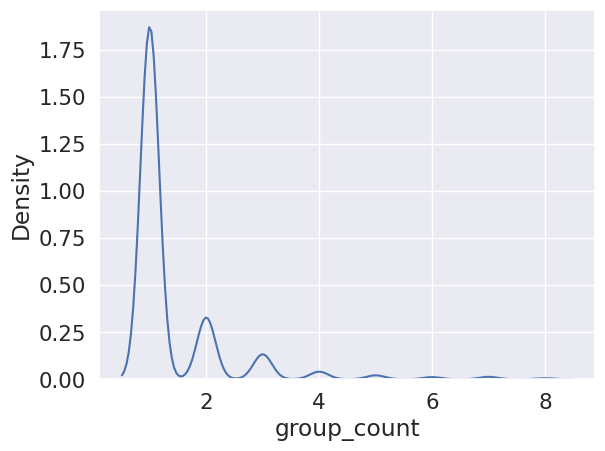

In [ ]:
sns.kdeplot(group_count['group_count'])
plt.show()

In [ ]:
# maybe group-size has an effect??

group_transported = df.groupby('passenger_group')['transported'].sum().rename('transported_count').reset_index().sort_values(by='transported_count', ascending=False)

group_transported.head()

,passenger_group,transported_count
4072,6030,7
2578,3850,6
3913,5812,6
1311,1976,6
4151,6139,6


In [ ]:
combined_group_info = pd.merge(group_transported, group_count, on='passenger_group').sort_values(by=['transported_count', 'group_count'], ascending=False)

combined_group_info.head(50)

,passenger_group,transported_count,group_count
0,6030,7,7
1,3850,6,7
3,1976,6,7
5,4625,6,7
6,6334,6,7
2,5812,6,6
4,6139,6,6
7,4663,6,6
22,4005,5,8
25,5885,5,8


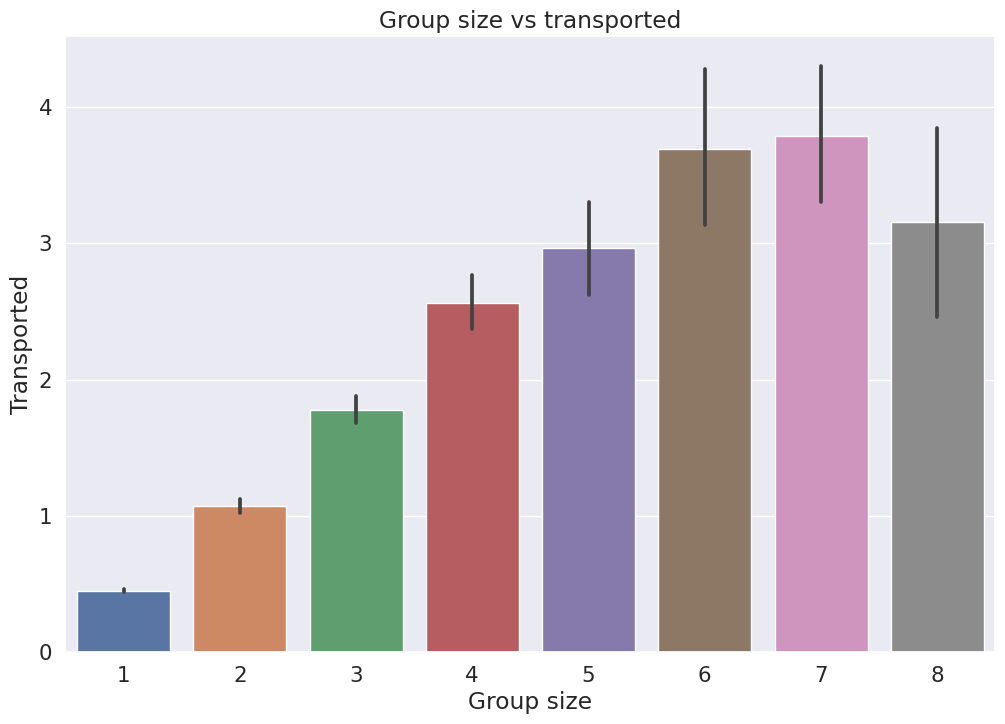

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='group_count', y='transported_count', data=combined_group_info)
plt.title('Group size vs transported')
plt.xlabel('Group size')
plt.ylabel('Transported')
plt.show()

In [ ]:
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4


# Deck and Side

In [ ]:
# find correlation with deck/side with transported

In [ ]:
df['deck'] = df['cabin'].apply(lambda x: str(x).split('/')[0])
df['side'] = df['cabin'].apply(lambda x: str(x).split('/')[-1])


deck_mean = df.groupby('deck')['transported'].mean().reset_index()

side_mean = df.groupby('side')['transported'].mean().reset_index()



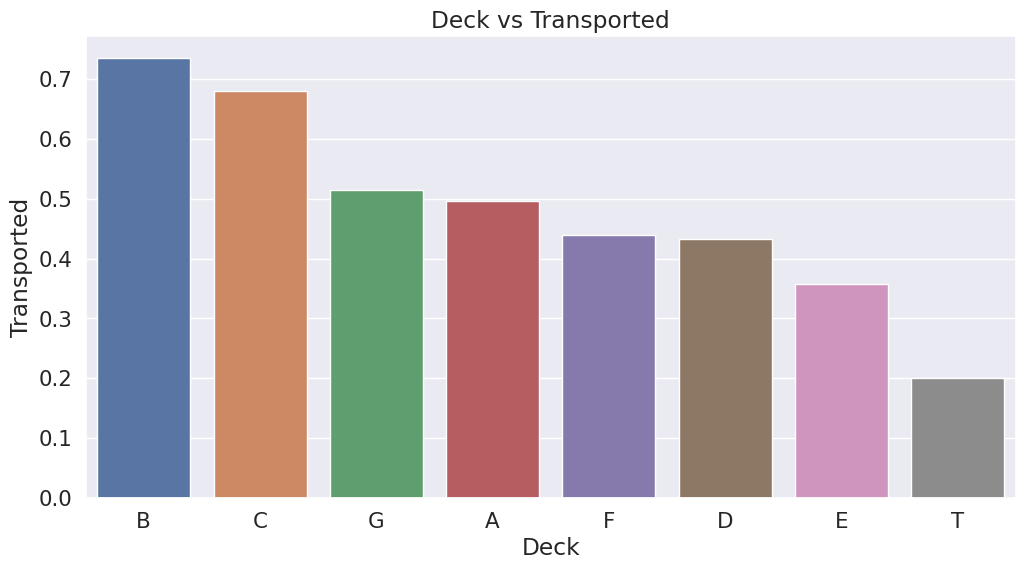

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='deck', y='transported', data=deck_mean.sort_values(by='transported', ascending=False))
plt.title('Deck vs Transported')
plt.xlabel('Deck')
plt.ylabel('Transported')
plt.show()

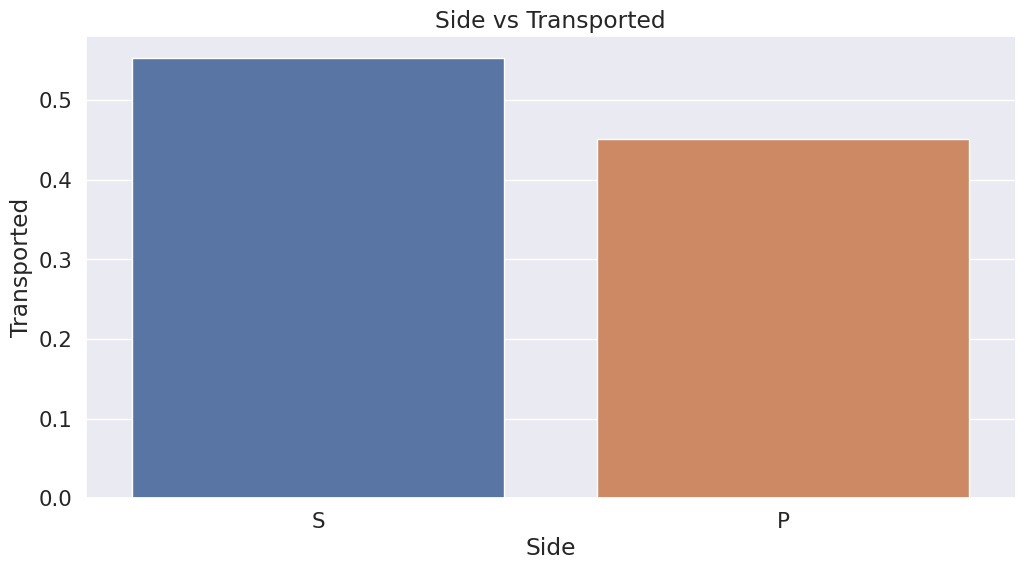

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='side', y='transported', data=side_mean.sort_values(by='transported', ascending=False))
plt.title('Side vs Transported')
plt.xlabel('Side')
plt.ylabel('Transported')
plt.show()


In [ ]:
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group,deck,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,S


In [ ]:
str_columns

['passengerid',
 'homeplanet',
 'cryosleep',
 'cabin',
 'destination',
 'vip',
 'name']

# Anaylzing columns with low cardinality

In [ ]:
# let's talk about homeplanet
df['homeplanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: homeplanet, dtype: int64

<Axes: xlabel='homeplanet', ylabel='count'>

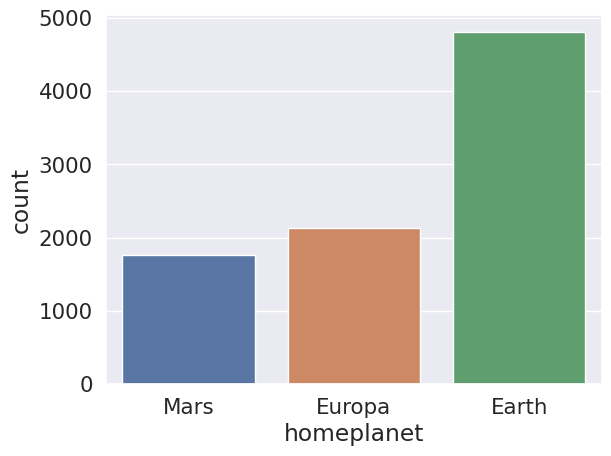

In [ ]:
sns.countplot(x='homeplanet', data = df.sort_values(by='homeplanet', ascending=False))
plt.show()

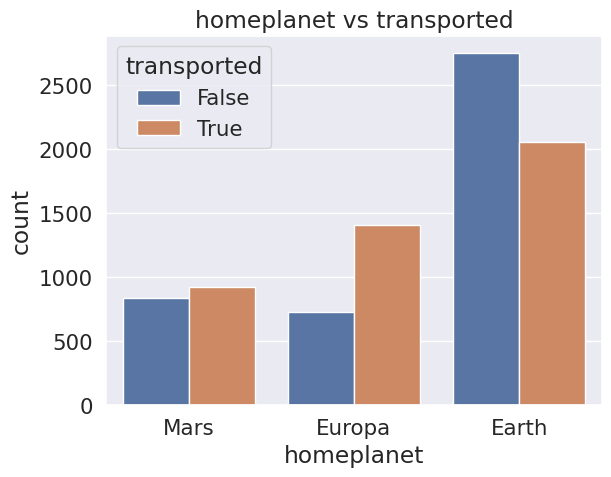

In [ ]:
sns.countplot(x='homeplanet', hue='transported', data = df.sort_values(by='homeplanet', ascending=False))
plt.title('homeplanet vs transported')
plt.show()

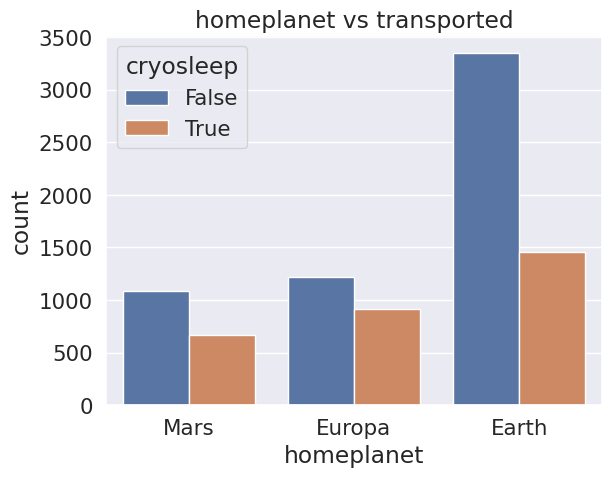

In [ ]:
sns.countplot(x='homeplanet', hue='cryosleep', data = df.sort_values(by='homeplanet', ascending=False))
plt.title('homeplanet vs transported')
plt.show()

In [ ]:
homeplanet_cryosleep_mean = df.groupby('homeplanet')['cryosleep'].mean().reset_index()

homeplanet_cryosleep_mean

,homeplanet,cryosleep
0,Earth,0.303352
1,Europa,0.427499
2,Mars,0.380330


In [ ]:
homeplanet_transported_mean = df.groupby('homeplanet')['transported'].mean().reset_index()

homeplanet_transported_mean

,homeplanet,transported
0,Earth,0.427649
1,Europa,0.658846
2,Mars,0.523024


<Axes: xlabel='homeplanet', ylabel='transported'>

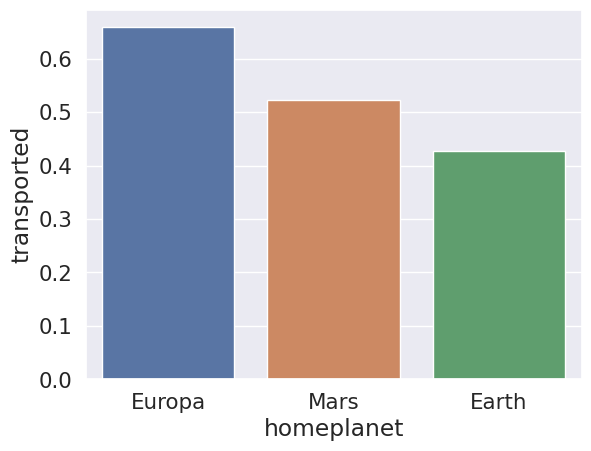

In [ ]:
sns.barplot(x='homeplanet', y='transported', data=homeplanet_transported_mean.sort_values('transported', ascending=False))
plt.show()

## CryoSleep

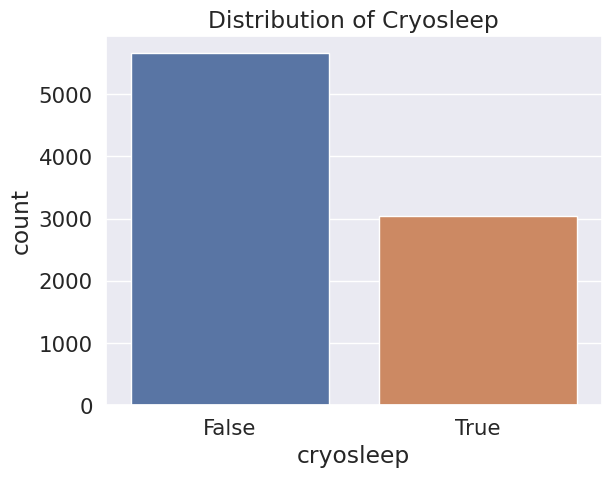

In [ ]:
sns.countplot(x='cryosleep', data=df.sort_values(by='cryosleep', ascending=True))
plt.title('Distribution of Cryosleep')
plt.show()

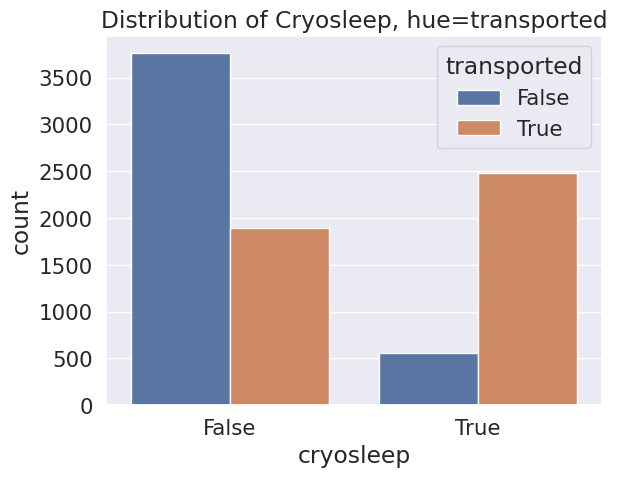

In [ ]:
sns.countplot(x='cryosleep', data=df.sort_values(by='cryosleep', ascending=True), hue='transported')
plt.title('Distribution of Cryosleep, hue=transported')
plt.show()


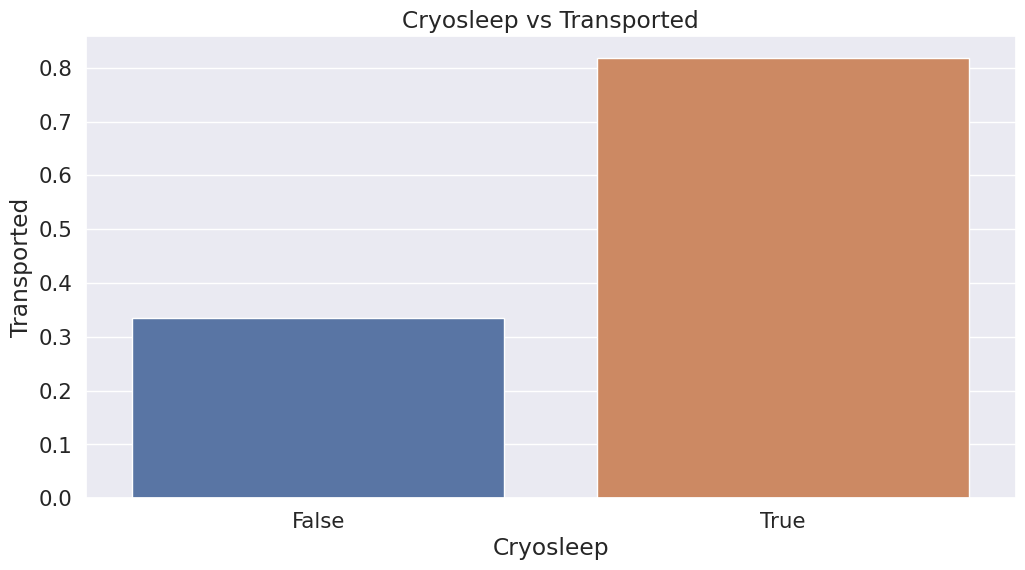

In [ ]:
cryosleep_mean = df.groupby('cryosleep')['transported'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='cryosleep', y='transported', data=cryosleep_mean.sort_values(by='transported', ascending=False))
plt.title('Cryosleep vs Transported')
plt.xlabel('Cryosleep')
plt.ylabel('Transported')
plt.show()

## relation of destination with transported

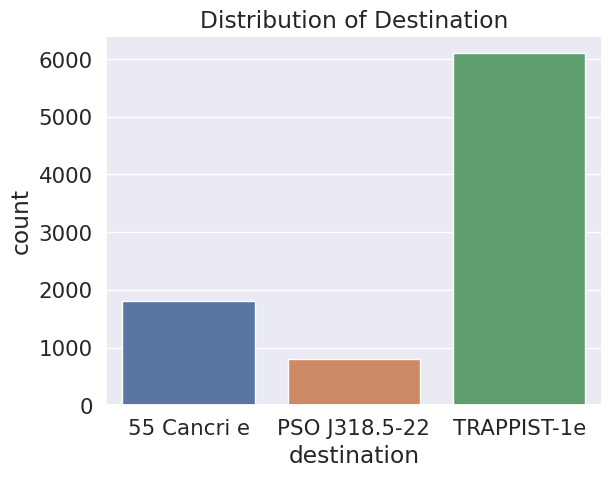

In [ ]:
sns.countplot(x='destination', data=df.sort_values(by='destination', ascending=True))
plt.title('Distribution of Destination')
plt.show()


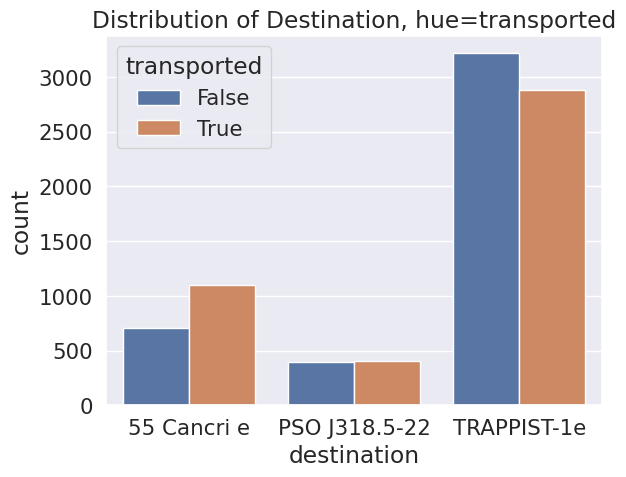

In [ ]:
sns.countplot(x='destination', data=df.sort_values(by='destination', ascending=True), hue='transported')
plt.title('Distribution of Destination, hue=transported')
plt.show()

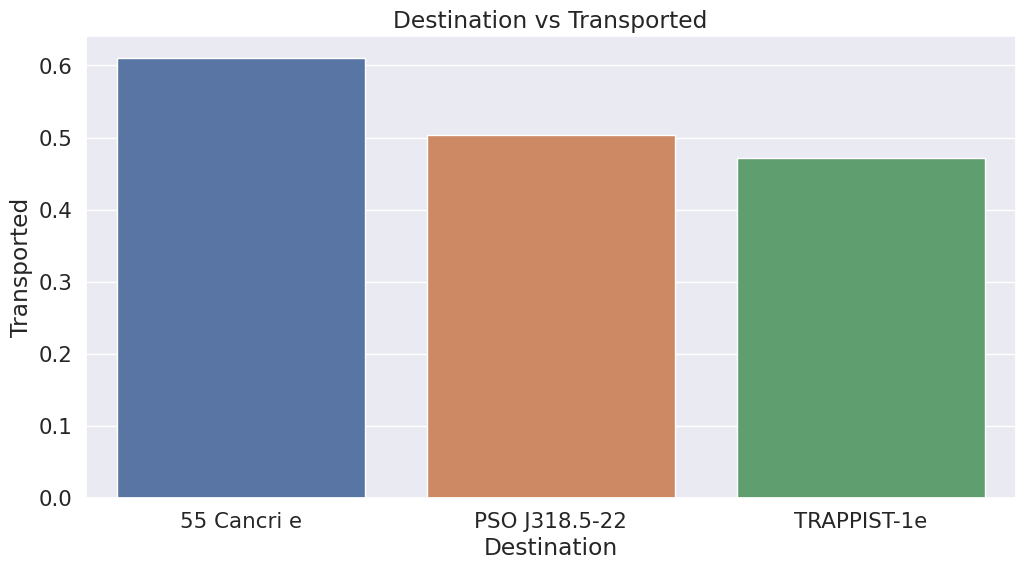

In [ ]:
destination_mean = df.groupby('destination')['transported'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='destination', y='transported', data=destination_mean.sort_values(by='transported', ascending=False))
plt.title('Destination vs Transported')
plt.xlabel('Destination')
plt.ylabel('Transported')
plt.show()

## Vip people and relation with transported

In [ ]:
df['vip'].value_counts()

False    8494
True      199
Name: vip, dtype: int64

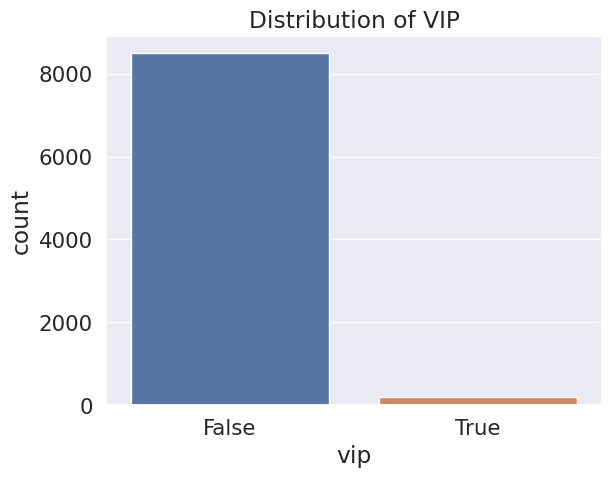

In [ ]:
sns.countplot(x='vip', data=df.sort_values(by='vip', ascending=True))
plt.title('Distribution of VIP')
plt.show()


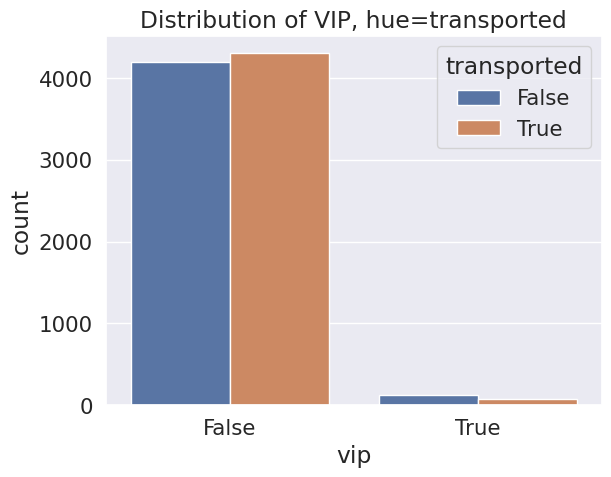

In [ ]:
sns.countplot(x='vip', data=df.sort_values(by='vip', ascending=True), hue='transported')
plt.title('Distribution of VIP, hue=transported')
plt.show()

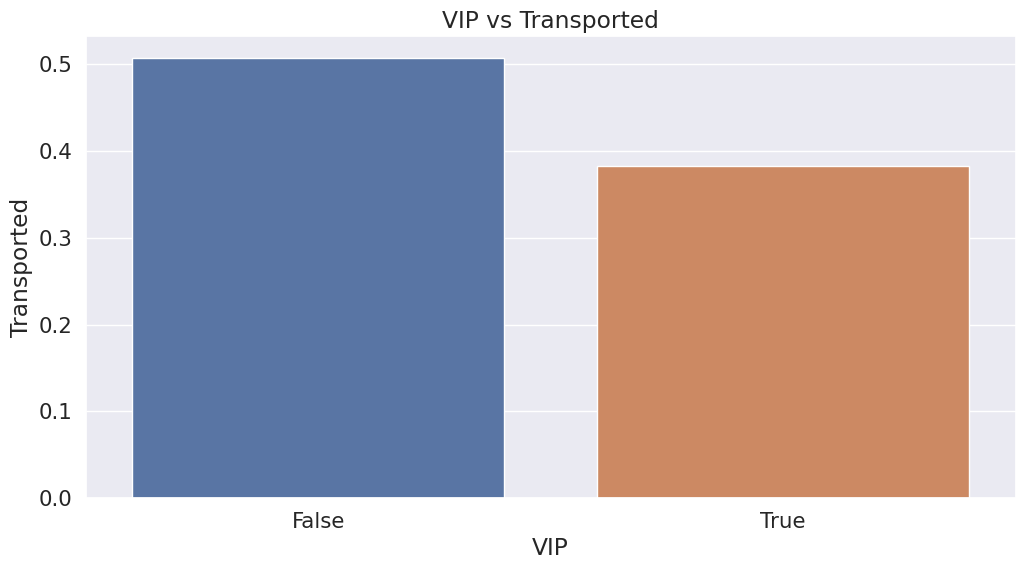

In [ ]:
vip_mean = df.groupby('vip')['transported'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='vip', y='transported', data=vip_mean.sort_values(by='transported', ascending=False))
plt.title('VIP vs Transported')
plt.xlabel('VIP')
plt.ylabel('Transported')
plt.show()

In [ ]:
str_columns

['passengerid',
 'homeplanet',
 'cryosleep',
 'cabin',
 'destination',
 'vip',
 'name']

# Analyzing numerical columns

In [ ]:
print("Numerical columns: ", num_columns)

Numerical columns:  ['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']


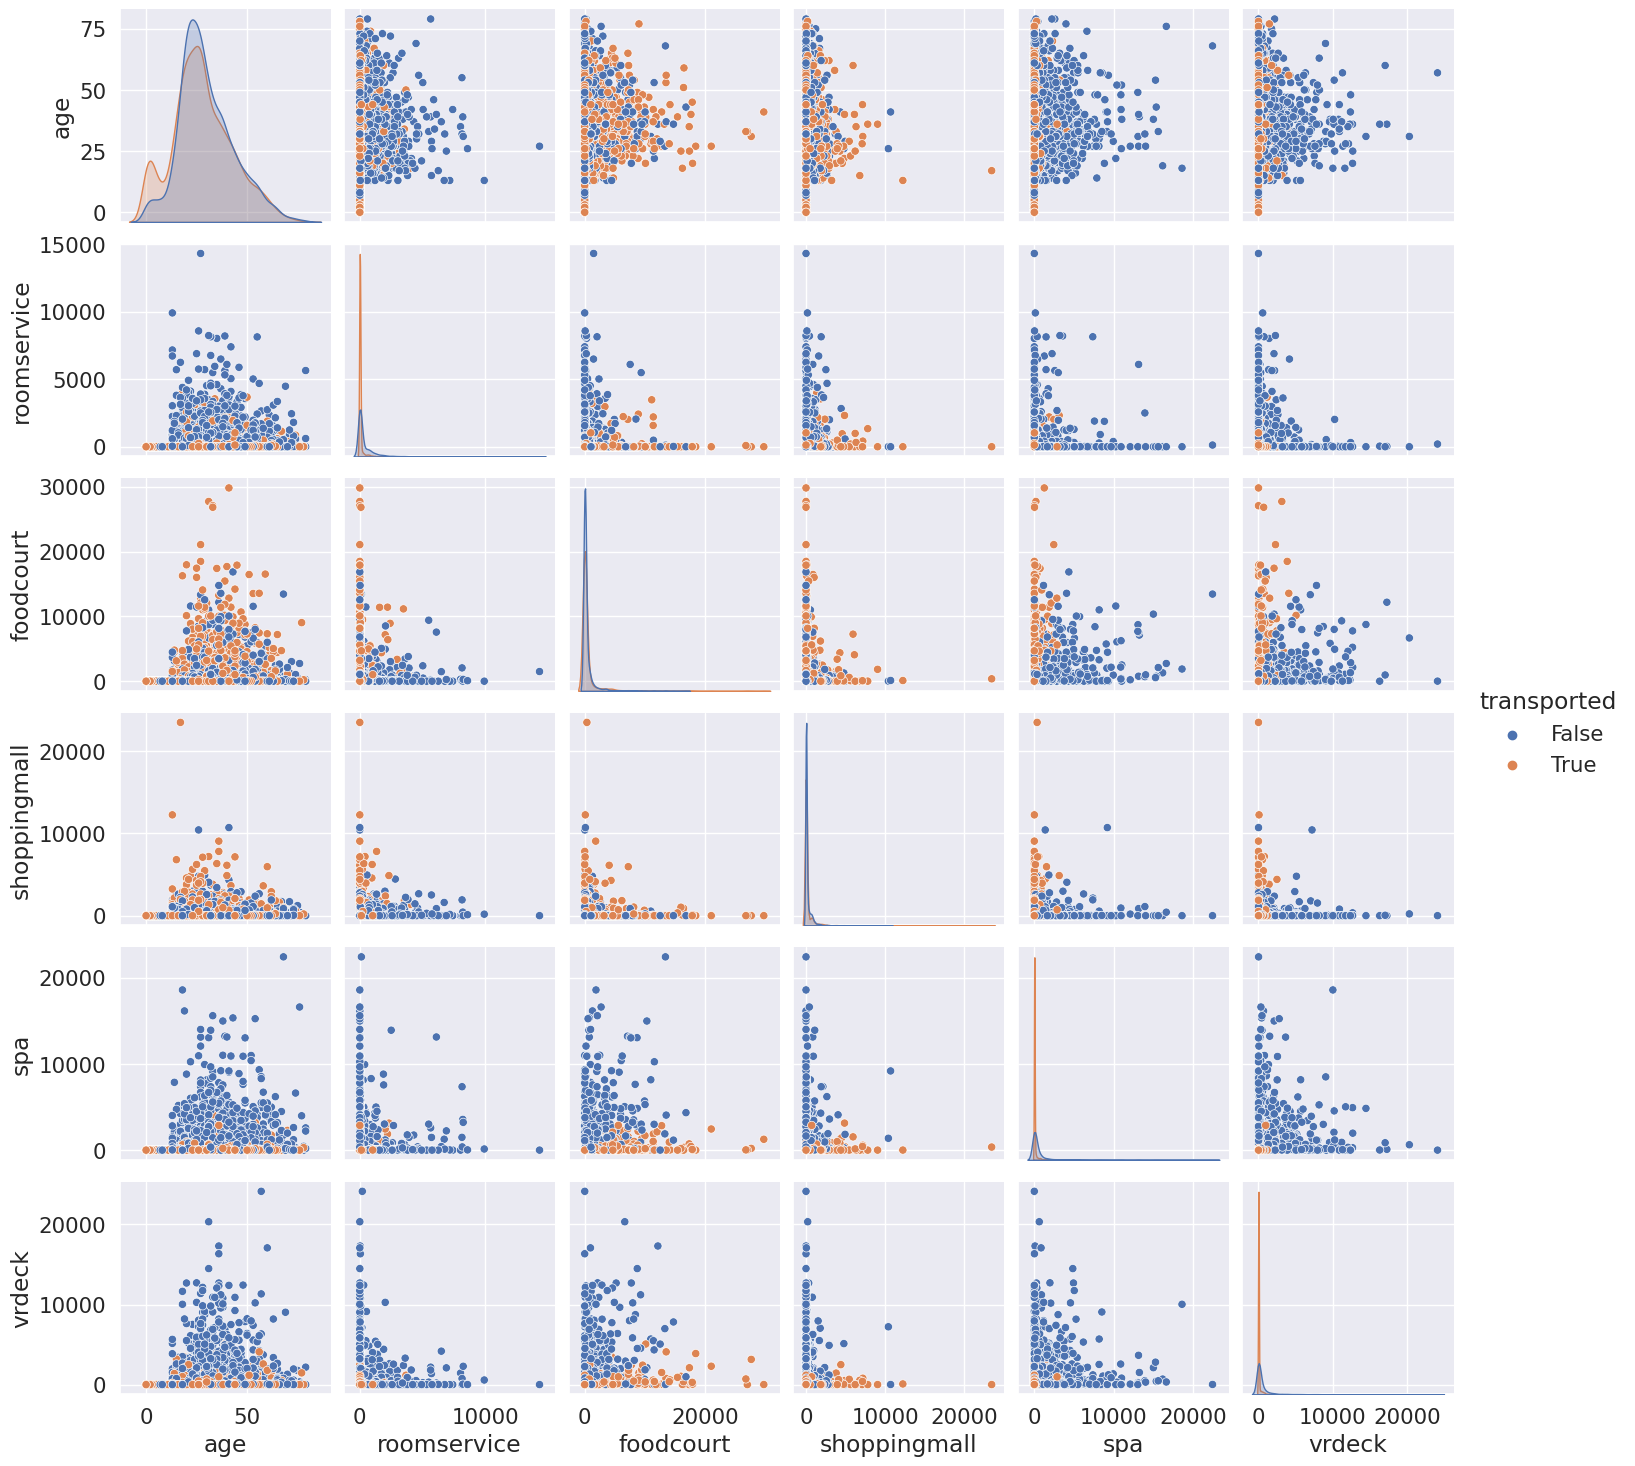

In [ ]:
sns.pairplot(df[num_columns + ['transported']], diag_kind='kde', hue='transported')
plt.show()

<Axes: >

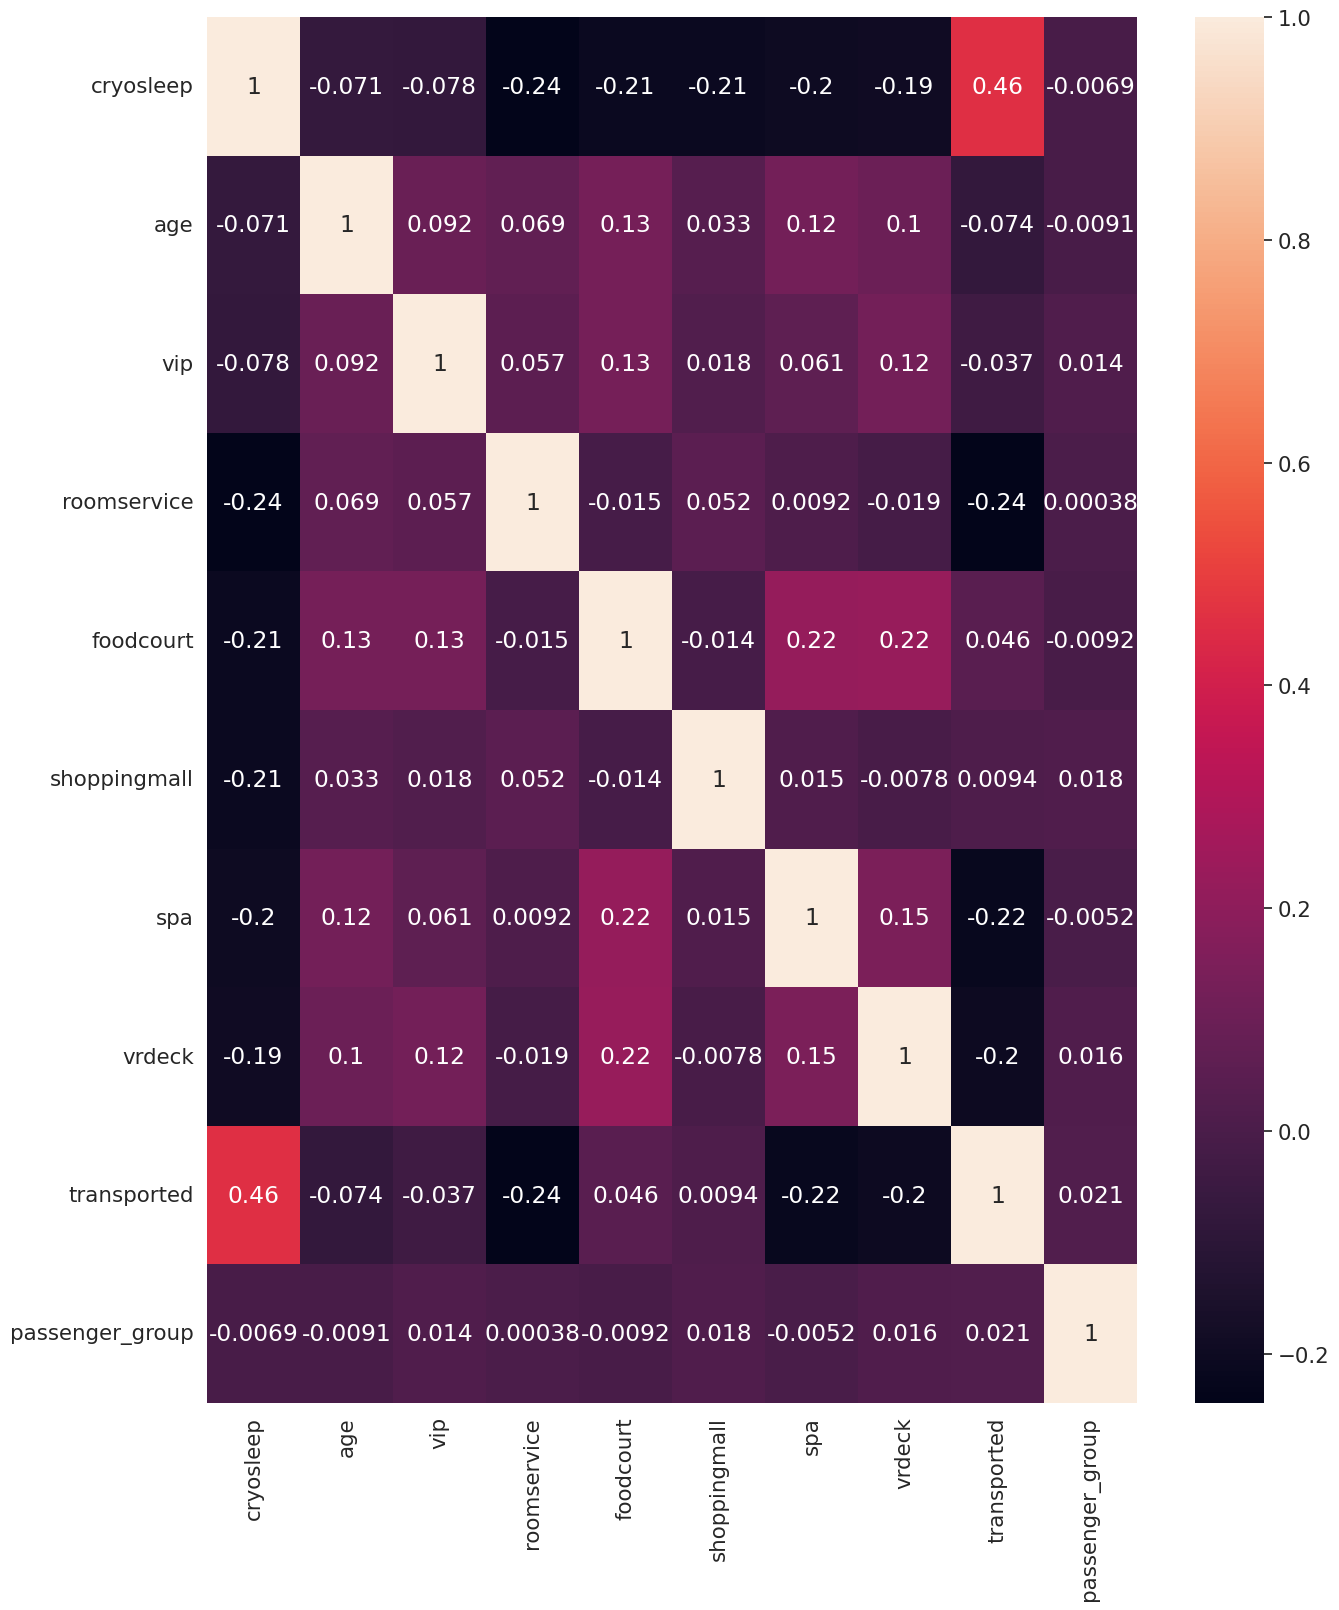

In [ ]:
plt.figure(figsize=(15, 18))
sns.heatmap(df.corr(), annot=True)

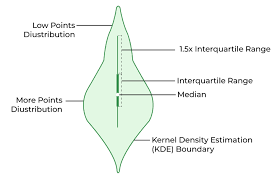

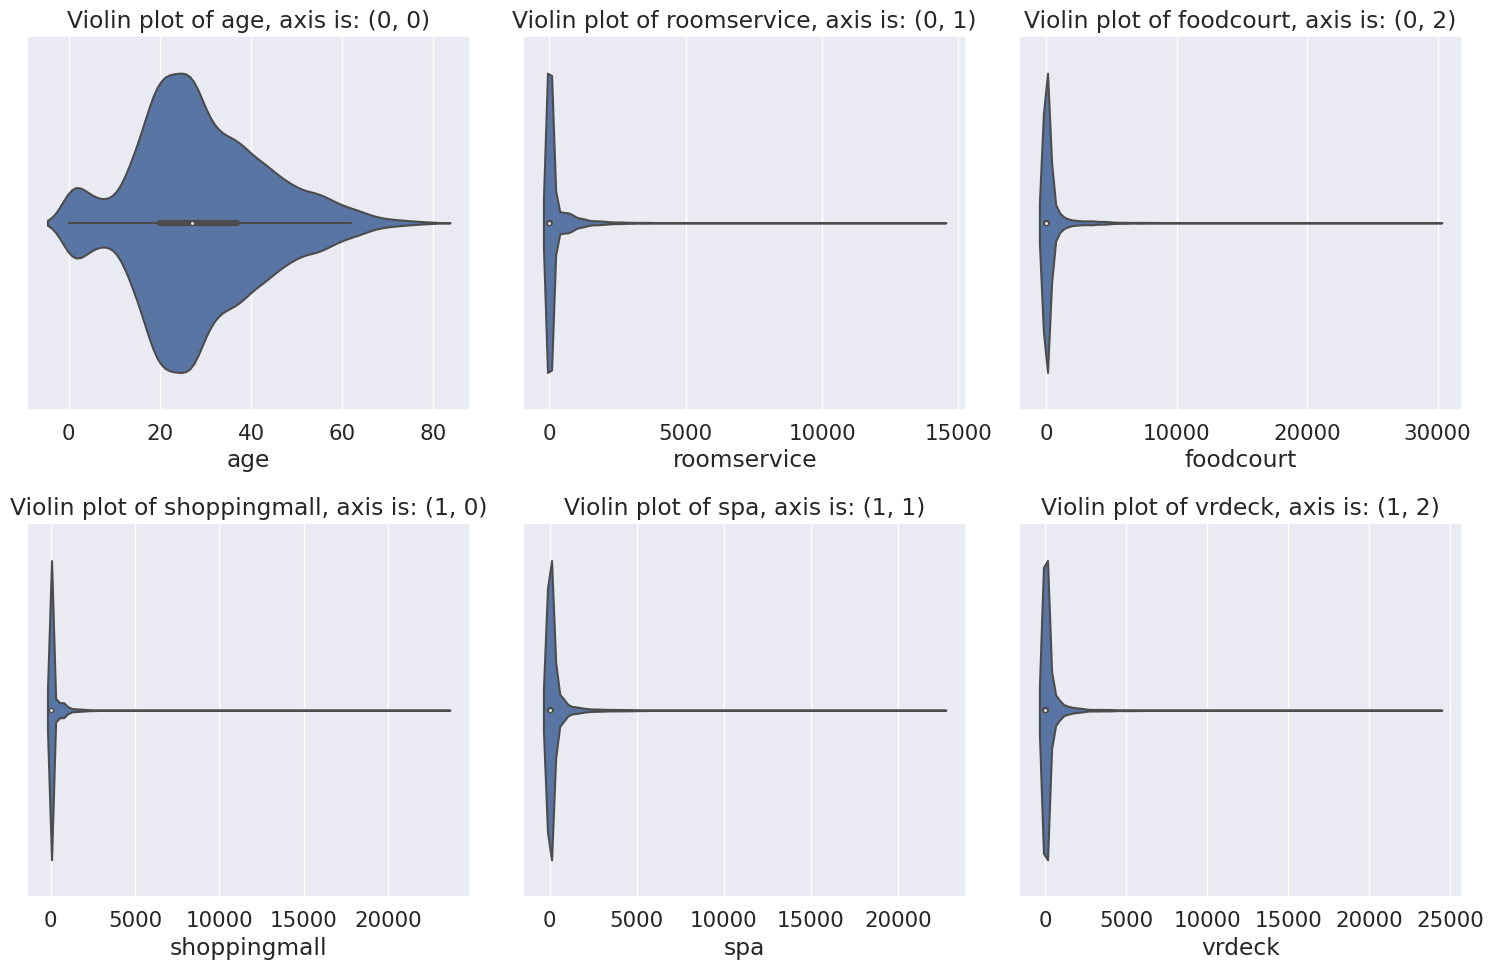

In [ ]:
# instead of sequential plots, I want to have subplots

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(num_columns):
    # print("axis is: ", i//3, i%3)
    sns.violinplot(x=col, data=df, ax=axes[i//3, i%3]).set_title(f"Violin plot of {col}, axis is: {i//3, i%3}")

plt.tight_layout()
plt.show()


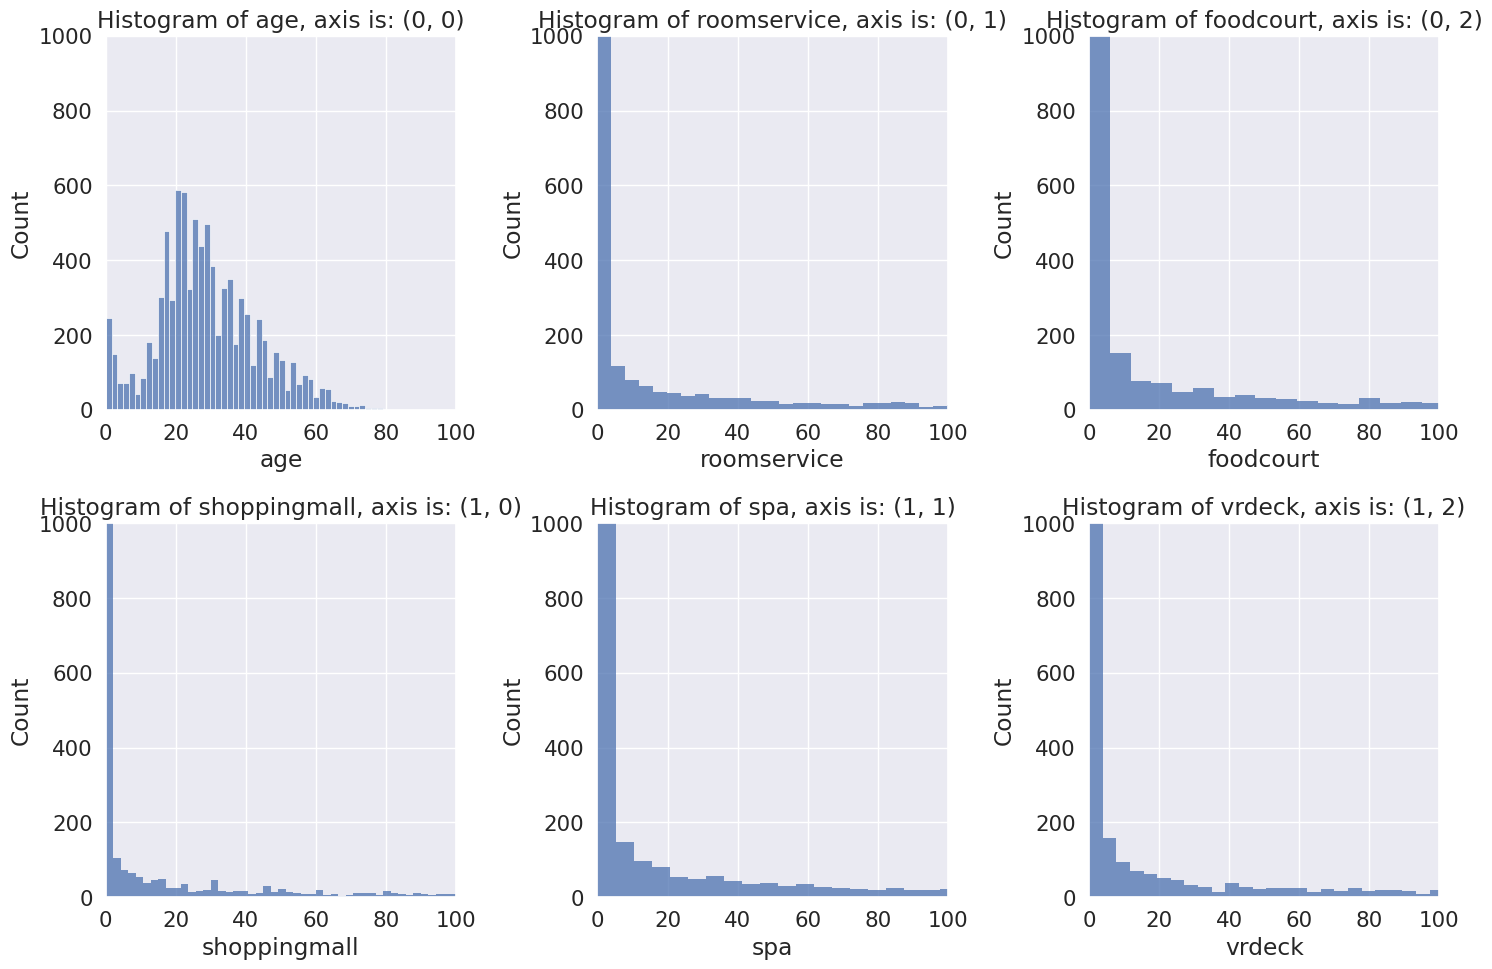

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(num_columns):
    # plot histogram
    sns.histplot(x=col, data=df, ax=axes[i//3, i%3]).set_title(f"Histogram of {col}, axis is: {i//3, i%3}")
    # add xlim and ylim
    axes[i//3, i%3].set_xlim(0, 100)
    axes[i//3, i%3].set_ylim(0, 1000)
plt.tight_layout()
plt.show()

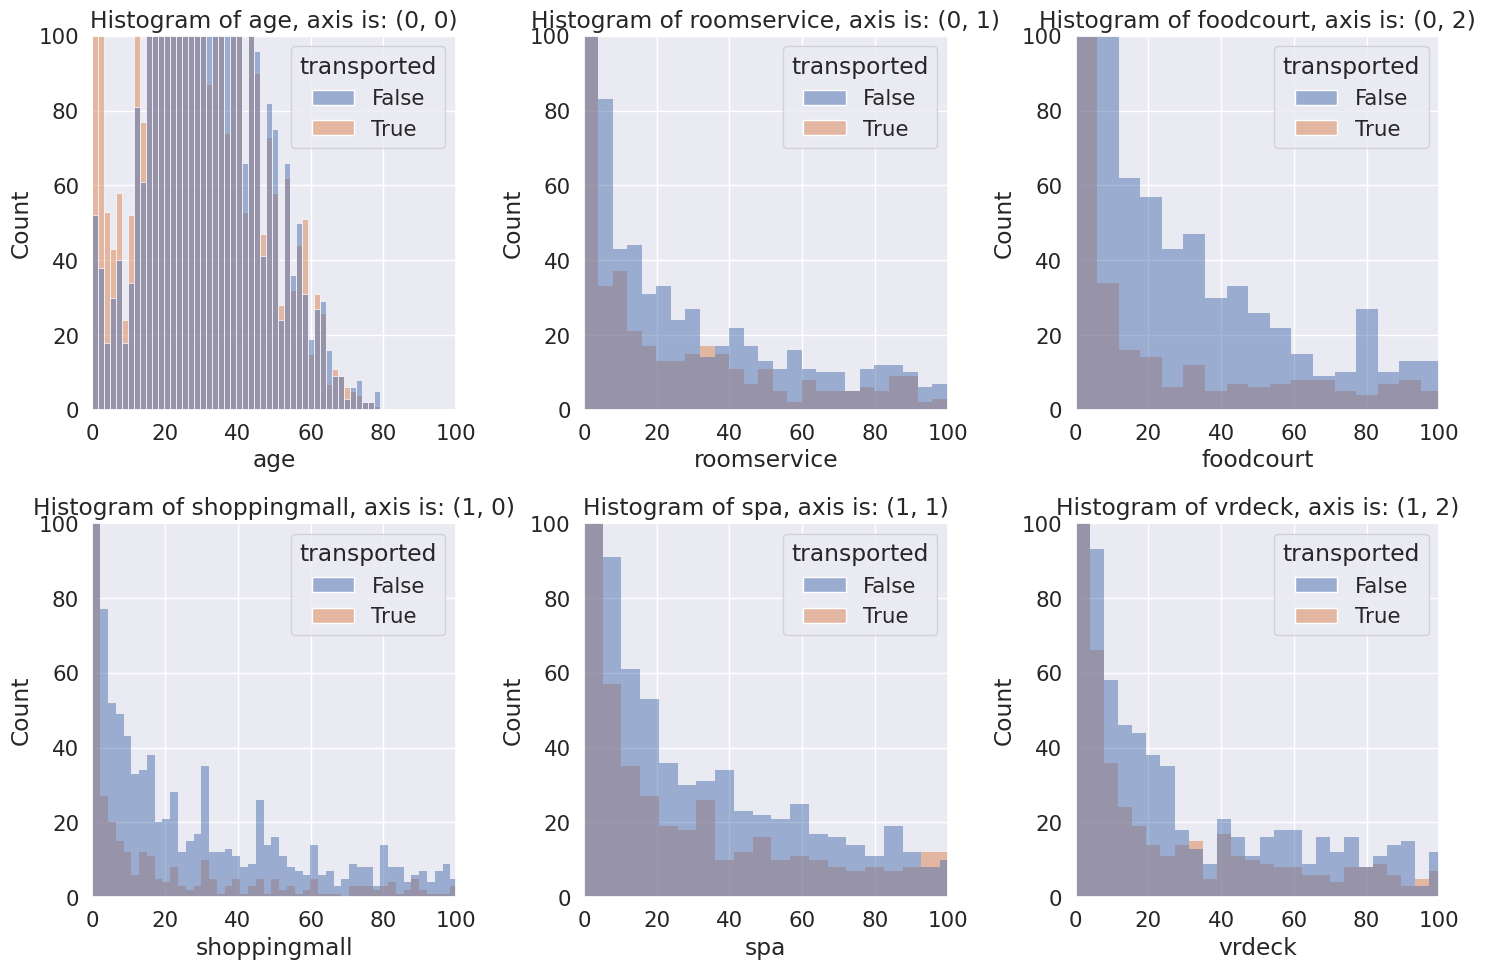

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(num_columns):
    # plot histogram
    sns.histplot(x=col, data=df, hue='transported', ax=axes[i//3, i%3]).set_title(f"Histogram of {col}, axis is: {i//3, i%3}")
    # add xlim and ylim
    axes[i//3, i%3].set_xlim(0, 100)
    axes[i//3, i%3].set_ylim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
num_columns

['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']

In [ ]:
# Construct box-plots for all numerical column in one plot

df_melted = pd.melt(df, id_vars = ['transported'], value_vars=['age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck'])
df_melted.tail(100)

,transported,variable,value
52058,False,vrdeck,426.0
52059,True,vrdeck,0.0
52060,True,vrdeck,337.0
52061,True,vrdeck,197.0
52062,False,vrdeck,70.0
...,...,...,...
52153,False,vrdeck,74.0
52154,False,vrdeck,0.0
52155,True,vrdeck,0.0
52156,False,vrdeck,3235.0


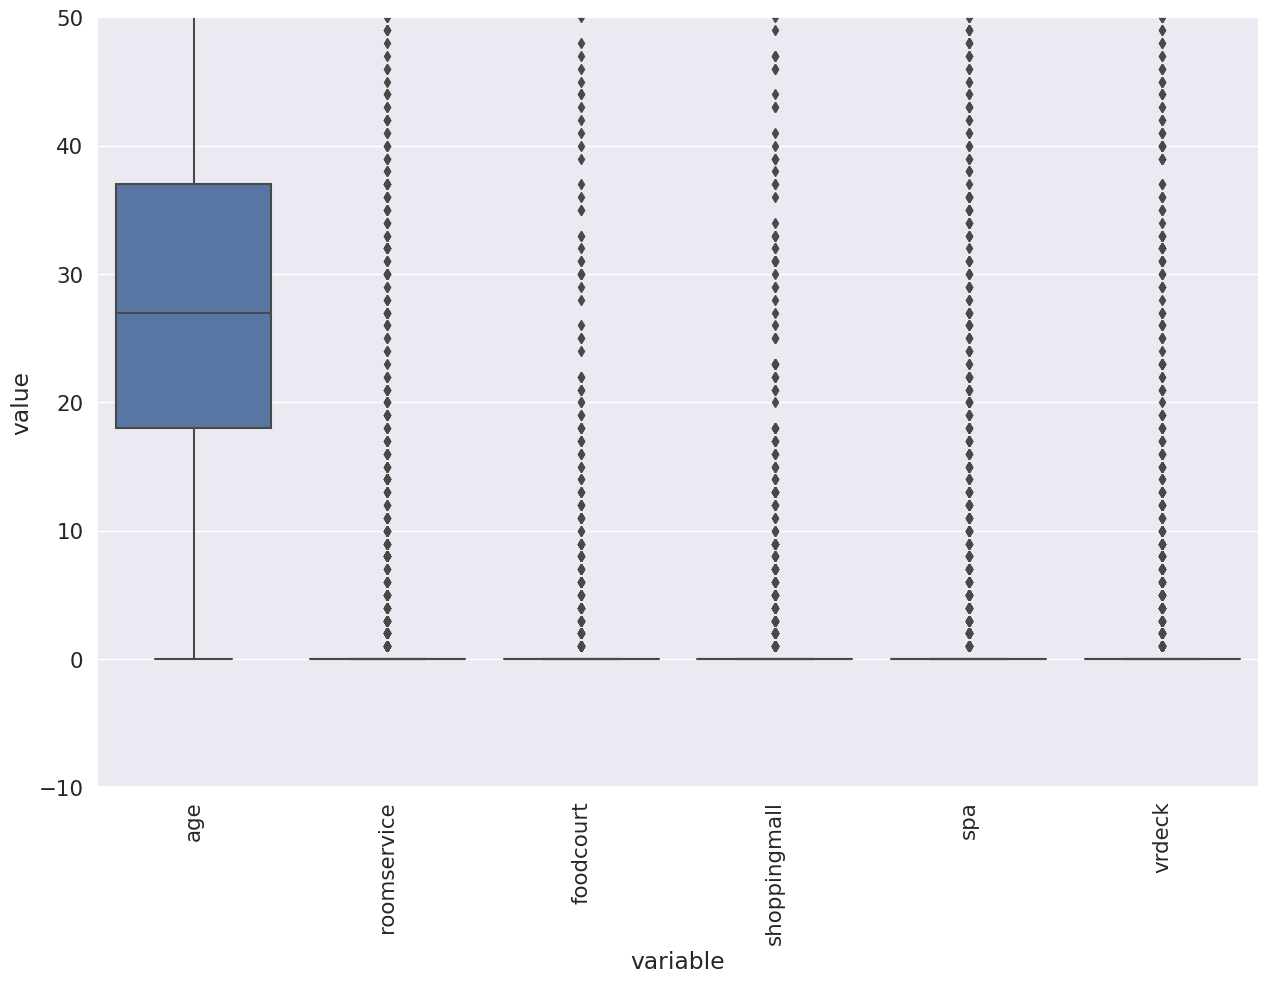

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=df_melted.loc[(df_melted['transported'] == True), ['variable', 'value']])
plt.ylim(-10, 50)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group,deck,side,age_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P,20-40
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S,20-40
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S,40-60
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,S,20-40
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,S,0-20


<Axes: xlabel='age_group', ylabel='count'>

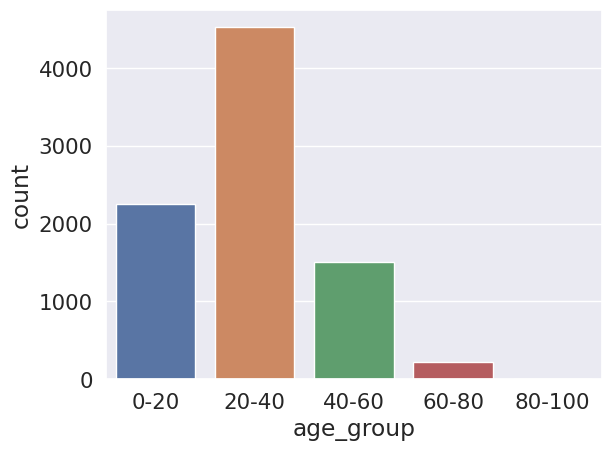

In [ ]:
sns.countplot(x='age_group', data = df)

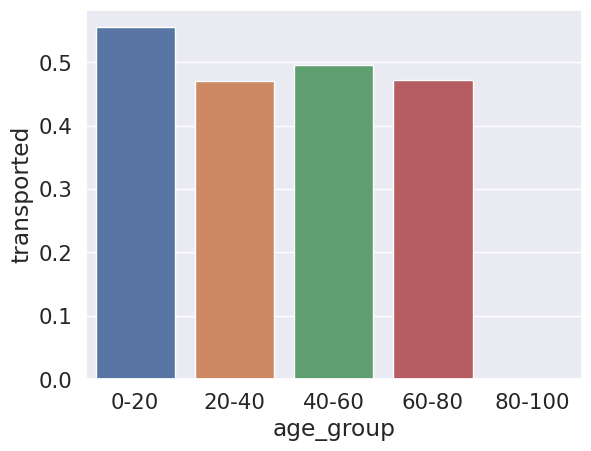

In [ ]:

age_mean = df.groupby('age_group')['transported'].mean().reset_index()

sns.barplot(x='age_group', y='transported', data=age_mean)
plt.show()

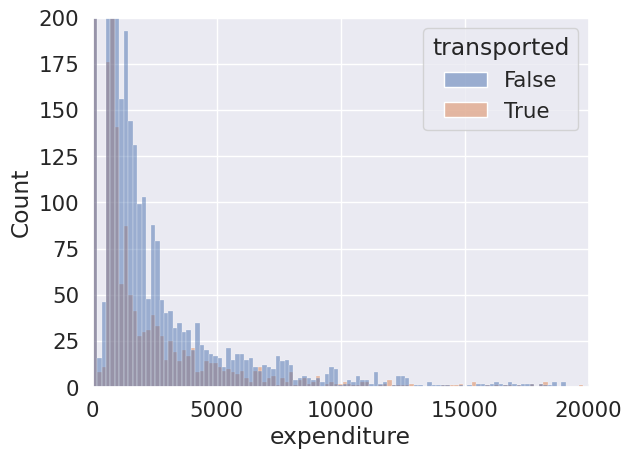

In [ ]:
df['expenditure'] = df[['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']].sum(axis=1)


# plot expenditure vs transported

sns.histplot(x='expenditure', data=df, hue='transported', bins=200)
plt.xlim(0, 20000)
plt.ylim(0, 200)
plt.show()

0 passengerid                0001_01
homeplanet                  Europa
cryosleep                    False
cabin                        B/0/P
destination            TRAPPIST-1e
age                           39.0
vip                          False
roomservice                    0.0
foodcourt                      0.0
shoppingmall                   0.0
spa                            0.0
vrdeck                         0.0
name               Maham Ofracculy
transported                  False
passenger_group                  1
deck                             B
side                             P
age_group                    20-40
expenditure                    0.0
Name: 0, dtype: object


# level in pandas dataframe

In [ ]:
arrays = [
    ['A', 'A', 'B', 'B'],
    [1, 2, 1 ,2]
]

index = pd.MultiIndex.from_arrays(arrays, names=('letters', 'numbers'))

df = pd.DataFrame(np.random.rand(4, 2), index=index, columns=['data1', 'data2'])

df

data1     data2
letters numbers                    
A       1        0.121104  0.440018
        2        0.194335  0.880188
B       1        0.156071  0.156852
        2        0.025793  0.027692

In [ ]:
df.isnull().sum(level=0)

,data1,data2
letters,,
A,1,0
B,0,0


In [ ]:
df.isnull().sum(level=1)

,data1,data2
numbers,,
1,1,0
2,0,0


In [ ]:
df

data1     data2
letters numbers                    
A       1             NaN  0.440018
        2        0.194335  0.880188
B       1        0.156071  0.156852
        2        0.025793  0.027692

In [ ]:
df.index

MultiIndex([('A', 1),
            ('A', 2),
            ('B', 1),
            ('B', 2)],
           names=['letters', 'numbers'])

In [ ]:
df.loc[('A', 1), 'data1'] = None

In [ ]:
df.reset_index().index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
df.unstack()

data1               data2          
numbers         1         2         1         2
letters                                        
A             NaN  0.194335  0.440018  0.880188
B        0.156071  0.025793  0.156852  0.027692

## Shallow copy and deep copy

In [ ]:
import pandas as pd

# Create a dummy DataFrame
df = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6]})

# Create a shallow copy
shallow_copy = df.copy(deep=False)

# Create a deep copy
deep_copy = df.copy(deep=True)

print("Original DataFrame:")
print(df)

print("\nShallow Copy:")
print(shallow_copy)

print("\nDeep Copy:")
print(deep_copy)


Original DataFrame:
   A  B
0  1  4
1  2  5
2  3  6

Shallow Copy:
   A  B
0  1  4
1  2  5
2  3  6

Deep Copy:
   A  B
0  1  4
1  2  5
2  3  6


In [ ]:
shallow_copy.at[0, 'A'] = 100

print("Original DataFrame:")
print(df)

print("\nShallow Copy:")
print(shallow_copy)


Original DataFrame:
     A  B
0  100  4
1    2  5
2    3  6

Shallow Copy:
     A  B
0  100  4
1    2  5
2    3  6


In [ ]:
deep_copy.at[0, 'B'] = 400

print("Original DataFrame:")
print(df)

print("\nDeep Copy:")
print(deep_copy)


Original DataFrame:
     A  B
0  100  4
1    2  5
2    3  6

Deep Copy:
   A    B
0  1  400
1  2    5
2  3    6
